In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
winedata = pd.read_csv('winedata.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#labled data
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<AxesSubplot:>

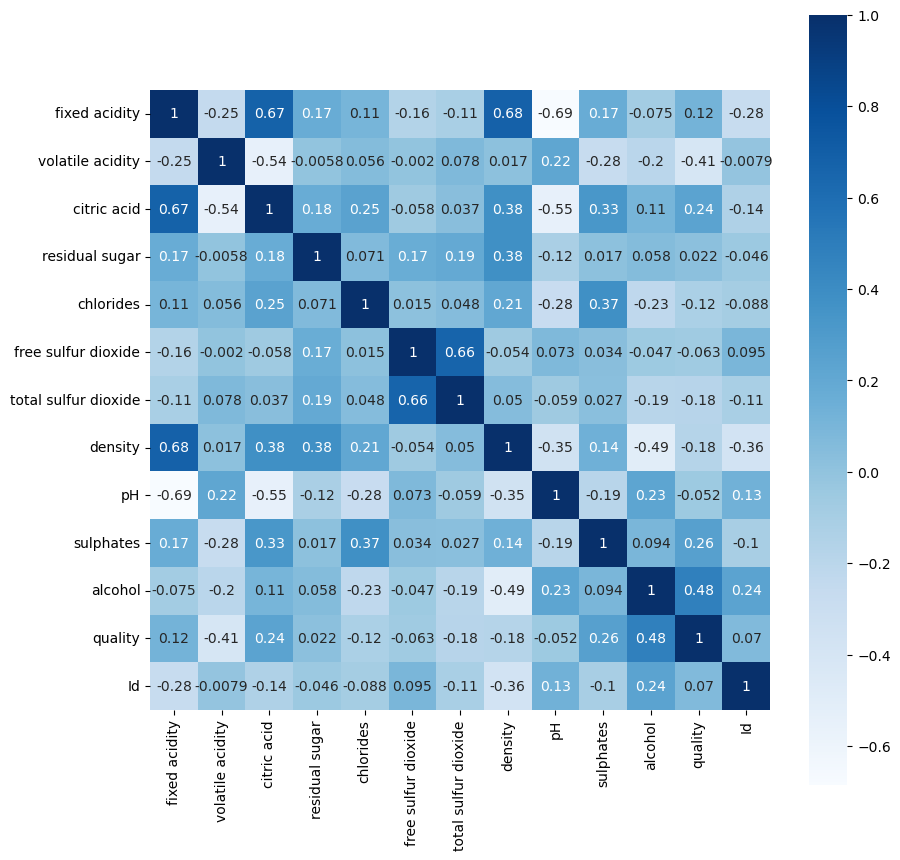

In [5]:
correlation = winedata.corr() # TN
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (10,10)) # Confusion matrices
sns.heatmap(correlation, vmax=1 , square=True , annot=True , cmap = 'Blues')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


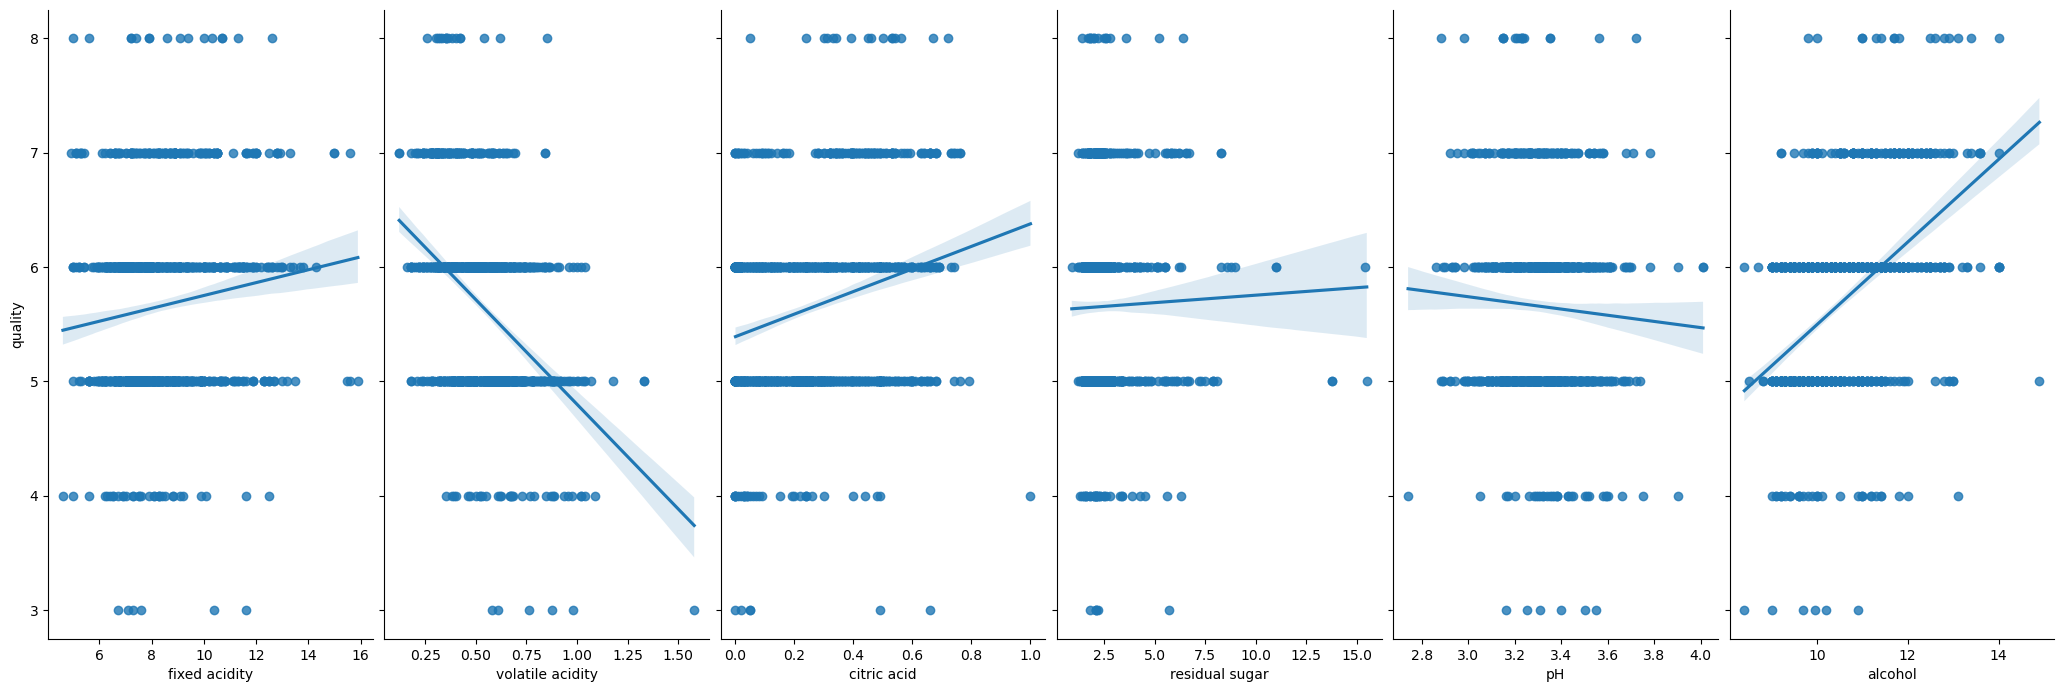

In [6]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'alcohol']
x = winedata[features]
y = winedata['quality']

sns.pairplot(winedata, x_vars=features, y_vars='quality', kind = 'reg', size = 7, aspect = 0.5)

In [7]:
x_train, x_test , y_train, y_test = train_test_split(x,y, random_state= 3)

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [9]:
accuracy = regressor.score(x_test, y_test)
print("Accuracy: {}%".format(int(round(accuracy*100))))

Accuracy: 40%


In [10]:
#which means i have a lose of 66% of wine quality
#Gradient Decident

def lo_cost(x , y , theta):
  inner = np.power(((x* theta.T)-y ),2)
  return np.sum(inner)/(2*len(x))


In [11]:
def GD(x, y , theta, alpha, iters):
  #store theta value
  temp = np.matrix(np.zeros(theta.shape))

  parameters = int(theta.ravel().shape[1])

  cost = np.zeros(iters + 1)
  cost [0] = lo_cost(x,y,theta)

  #calculate error on every step
  for i in range(iters):
    error = (x* theta.T)- y

    for j in range(parameters):
      term = np.multiply(error, x[:,j])
      temp[0,j] = theta[0,j] - ((alpha /len(x))) * np.sum(term)

    theta = temp

    cost [i + 1] = lo_cost(x, y, theta)

  return theta, cost

In [12]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
x = pd.DataFrame(winedata['alcohol'])

x['x_0'] = 1
y = winedata['quality']

In [14]:
#import numpy as np
#x = np.matrix(x.values)
#y = np.matrix(y.values).T
#theta = np.matrix(np.zeros(shape=[1, x.shape[1]]))

#lo_cost(x,y, theta)
#theta_final = cost = GD(x,y, theta , alpha)

sigma = winedata.std()
me = winedata.mean()
print("Standrad Deviation", sigma)
print("Average", me)


Standrad Deviation fixed acidity             1.747595
volatile acidity          0.179633
citric acid               0.196686
residual sugar            1.355917
chlorides                 0.047267
free sulfur dioxide      10.250486
total sulfur dioxide     32.782130
density                   0.001925
pH                        0.156664
sulphates                 0.170399
alcohol                   1.082196
quality                   0.805824
Id                      463.997116
dtype: float64
Average fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

winedata = pd.read_csv('winedata.csv')
#X = winedata.drop(['pH'], axis= 1)
#y = winedata['pH ']

lm = LinearRegression(fit_intercept= True , normalize=True)

In [20]:
X_ = np.matrix(x.values)

In [23]:
X_hat_sk = np.zeros((100, x.shape[1]))
for i in range(x.shape[1]):
  X_hat_sk[:,i] = np.linspace(X_[:,i].min(), X_[:,i].max(), 100)

#y_hat_sk = lm.predict(x_hat_sk)

In [ ]:
#Linear regression is the only best way to Find Prediction in wines
